# **0. Введение**

### Структура датасета
Данные взяты с сайта kaggle.com и представляют из себя информацию о треках, опубликованных на стриминговом сервисе Spotify. Запись о каждом треке содержит следующие признаки:
*   Artist_name - имя артиста
*   Track_name - название трека
*   Track_id - ID трека
*   Popularity - популярность песни (от 0 до 100)
*   Year - год выпуска (от 2000 до 2023)
*   Genre - жанр трека
*   Danceability - пригодность трека для танцев (от 0.0 до 1.0)
*   Energy - мера интенсивности трека (от 0.0 до 1.0)
*   Key - тональность трека (от 0 до 11)
*   Loudness - громкость трека в децибелах (от -60 до 0 dB)
*   Mode - лад песни (1 - мажор, 0 - минор)
*   Speechiness - частота слов, которые были проговорены
*   Acousticness - мера того, насколько трек акустический (от 0.0 до 1.0)
*   Instrumental - содержит ли трек вокал
*   Liveness - присутствие публики в записи (от 0.0 до 1.0)
*   Valence - мера "позитивности" трека (от 0.0 до 1.0, где 0 - более агрессивная музыка, а 1.0 - более мягкая)
*   Tempo - темп песни (в beats per minute)
*   Time_signature - музыкальный размер трека (от 3 до 7, в четвертях)
*   Duration_ms - длительность трека в миллисекундах



In [1]:
# работа с python и R в одном notebook
%load_ext rpy2.ipython

In [ ]:
# Python
# импорт необходимых библиотек

import pip
pip.main(["install", "outlier_utils", "pingouin"])
import pandas as pd
import numpy as np
import sklearn
import matplotlib
import seaborn as sns
import scipy as sp
import matplotlib.pyplot as plt

In [ ]:
%%R
install.packages("outliers")
library(outliers)
library(dplyr)
install.packages("nortest")
library(nortest)

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

In [8]:
#Python
song_data = pd.read_csv('/content/drive/My Drive/Colab Notebooks/spotify_data.csv')
song_data.head()

,Unnamed: 0,artist_name,track_name,track_id,popularity,year,genre,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,0,Jason Mraz,I Won't Give Up,53QF56cjZA9RTuuMZDrSA6,68,2012,acoustic,0.483,0.303,4,-10.058,1,0.0429,0.6940,0.000000,0.1150,0.139,133.406,240166,3
1,1,Jason Mraz,93 Million Miles,1s8tP3jP4GZcyHDsjvw218,50,2012,acoustic,0.572,0.454,3,-10.286,1,0.0258,0.4770,0.000014,0.0974,0.515,140.182,216387,4
2,2,Joshua Hyslop,Do Not Let Me Go,7BRCa8MPiyuvr2VU3O9W0F,57,2012,acoustic,0.409,0.234,3,-13.711,1,0.0323,0.3380,0.000050,0.0895,0.145,139.832,158960,4
3,3,Boyce Avenue,Fast Car,63wsZUhUZLlh1OsyrZq7sz,58,2012,acoustic,0.392,0.251,10,-9.845,1,0.0363,0.8070,0.000000,0.0797,0.508,204.961,304293,4
4,4,Andrew Belle,Sky's Still Blue,6nXIYClvJAfi6ujLiKqEq8,54,2012,acoustic,0.430,0.791,6,-5.419,0,0.0302,0.0726,0.019300,0.1100,0.217,171.864,244320,4


In [10]:
%%R
song_data = read.csv('/content/drive/My Drive/Colab Notebooks/spotify_data.csv')
head(song_data)

  X   artist_name       track_name               track_id popularity year
1 0    Jason Mraz  I Won't Give Up 53QF56cjZA9RTuuMZDrSA6         68 2012
2 1    Jason Mraz 93 Million Miles 1s8tP3jP4GZcyHDsjvw218         50 2012
3 2 Joshua Hyslop Do Not Let Me Go 7BRCa8MPiyuvr2VU3O9W0F         57 2012
4 3  Boyce Avenue         Fast Car 63wsZUhUZLlh1OsyrZq7sz         58 2012
5 4  Andrew Belle Sky's Still Blue 6nXIYClvJAfi6ujLiKqEq8         54 2012
6 5 Chris Smither    What They Say 24NvptbNKGs6sPy1Vh1O0v         48 2012
     genre danceability energy key loudness mode speechiness acousticness
1 acoustic        0.483  0.303   4  -10.058    1      0.0429       0.6940
2 acoustic        0.572  0.454   3  -10.286    1      0.0258       0.4770
3 acoustic        0.409  0.234   3  -13.711    1      0.0323       0.3380
4 acoustic        0.392  0.251  10   -9.845    1      0.0363       0.8070
5 acoustic        0.430  0.791   6   -5.419    0      0.0302       0.0726
6 acoustic        0.566  0.570   2   -

# **1. Аппроксимация распределений с помощью ядерных оценок**













Гистограмма - неплохой в силу своей простоты метод оценки плотности вероятности, однако у него есть недостатки, один из которых - сильное влияние выбора разбиения на интервалы на результирующую визуализацию.
Для примера, будем строить гистограммы для оценки плотности вероятности темпа трека.


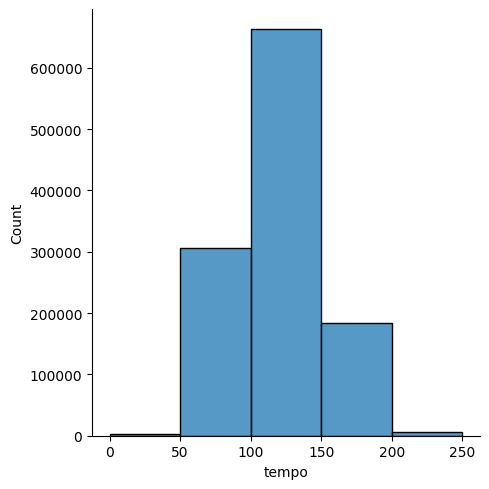

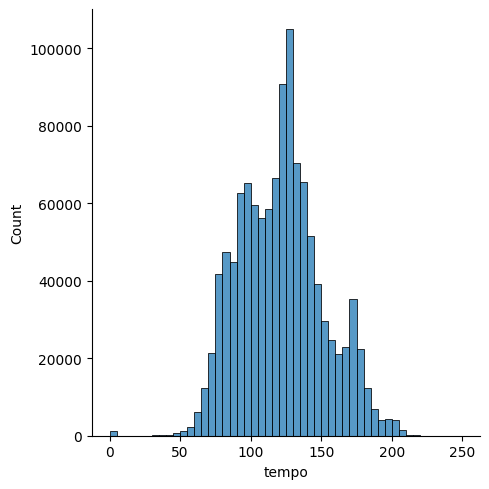

In [ ]:
#Python
sns.displot(data=song_data, x='tempo', binwidth=50)
sns.displot(data=song_data, x='tempo', binwidth=5)

Как может быть видно, две гистограммы выглядят по-разному, и это может привести к разной интерпретации данных. Здравый смысл подсказывает, что гистограмма с binwidth=5 ближе к истине, поскольку в основном человек чувствует разницу в темпе, если она превышает 5 bpm.

**Ядерная оценка плотности** - другой метод оценки плотности. Эта оценка строится следующим образом:
$$f(x) = \frac{1}{nh} \sum\limits_{i=1}^n g\left( \frac{x - x_i}{h} \right)$$
Здесь $g(x)$ - ядро (неотрицательная нормированная симметричная функция), $h$ - ширина окна.

В нашем случае используется гауссовское ядро: $g(x) = \frac{1}{\sqrt{2\pi}} e^{-\frac{x^2}{2}}$, а ширина окна $h$ подобрана эвристически таким образом, чтобы результирующая кривая плотности вероятности не имела слишком много изгибов.  

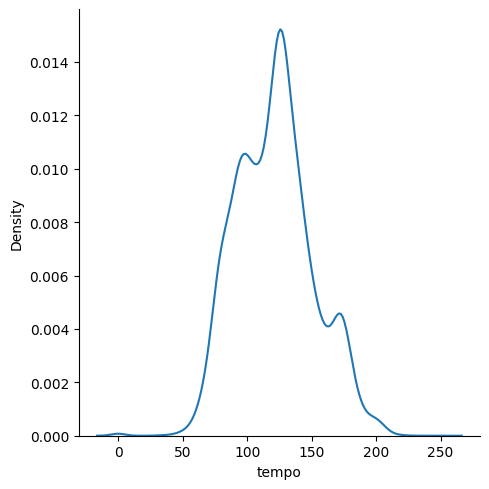

In [ ]:
#Python
sns.displot(data=song_data, x='tempo', kind='kde', bw_adjust=3)

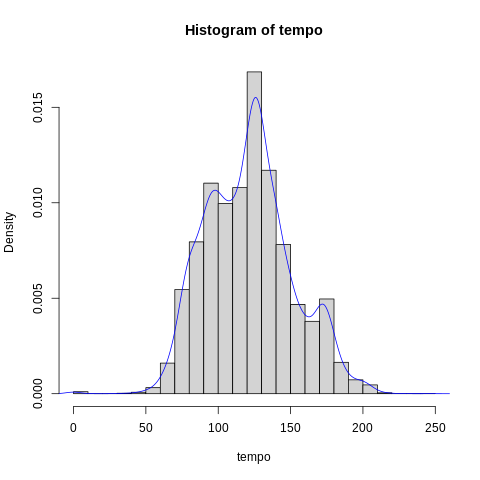

In [ ]:
%%R
tempo <- song_data$tempo
hist(tempo, freq=FALSE)
lines(density(tempo, bw=5), col="blue")

Из графика плотности видно, что у темпа есть три значения моды: 100 bpm, 125 bpm и 170 bpm.

# **2. Анализ данных с помощью cdplot, dotchart, boxplot и stripchart**

### **CDPLOT**

**Cdplot** (*conditional density plot*) - метод визуализации данных, позволяющий совмещать на одном графике плотности вероятности для каждого уровня
интересующей качественной переменной.

Исследуем зависимость параметра valence от жанра песни.

*Valence* - признак, указывающий на настроение песни, который принимает значения в диапазоне от 0.0 до 1.0. Значения, более близкие к нулю, показывают, что характер музыки более агрессивный/грустный, а значения, близкие к единице, говорят о более спокойном и умиротворённом характере композиции.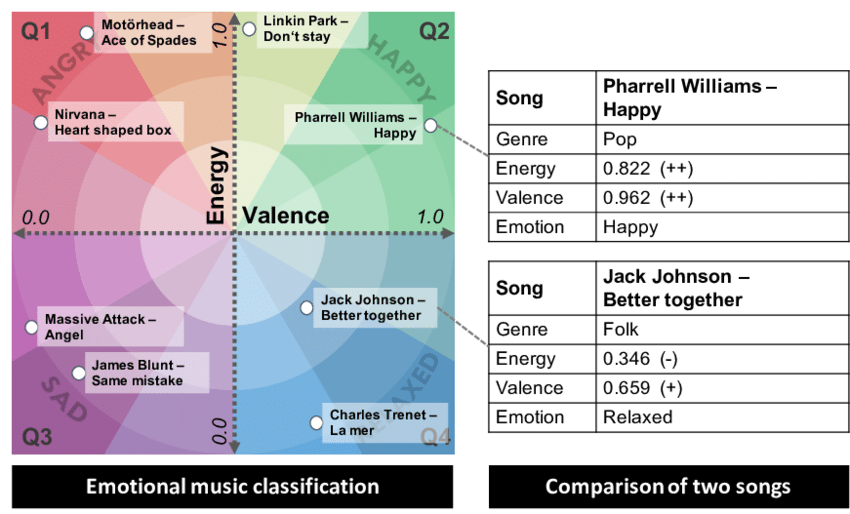

Для упрощения визуализации, ограничимся рассмотрением следующих жанров музыки: поп, метал, джаз и хип-хоп.

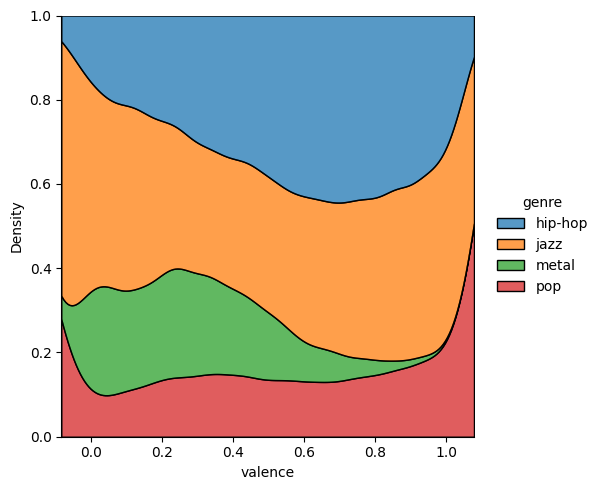

In [ ]:
#Python
temp = song_data[song_data.genre.isin(['pop', 'metal', 'jazz', 'hip-hop'])]
sns.displot(data=temp, hue='genre', multiple='fill', x='valence', kind='kde')

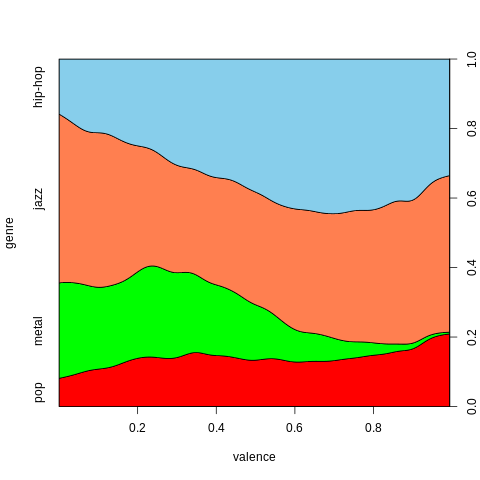

In [ ]:
%%R
temp <- subset(song_data, genre == 'pop' | genre == 'metal'| genre == 'jazz' | genre == 'hip-hop')
temp$genre <- factor(temp$genre)
cdplot(genre~valence, data=temp, col = c('red', 'green', 'coral', 'skyblue'))

В целом, можно заметить, что в джазе эмоциональная окраска композиций распределена равномерно; поп-музыка и хип-хоп имеют соответственно в окрестностях valence=0.7 и valence=1.0 максимум плотности (то есть преобладают более спокойные песни); в метале виднеется тяготение к более близким к нулю значениям valence, что говорит о более неспокойном характере музыки.

## **DOTCHART**

Нарисуем *точечную диаграмму* (dotchart): количество выпущенных треков за каждый год (с 2000 по 2023).

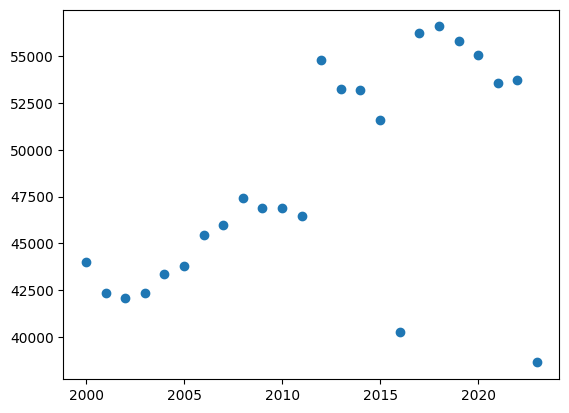

In [ ]:
#Python
temp = song_data.value_counts('year').sort_index()
plt.scatter(x=np.array([i for i in range (2000,2024)]), y=temp)

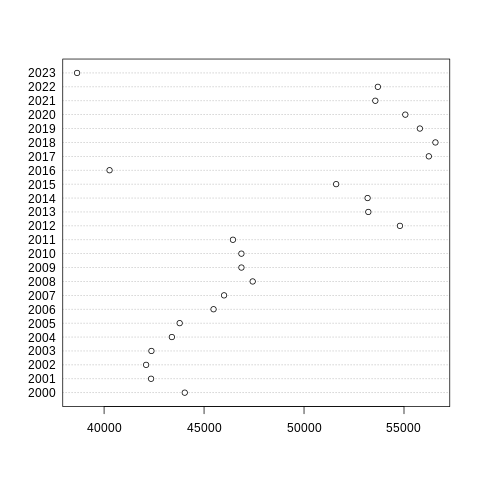

In [ ]:
%%R
temp <- song_data %>% count(year)
dotchart(temp$n, temp$y)

Видно тенденцию, что с каждым годом публикуется больше треков.

## **BOXPLOT**

**Boxplot** (*диаграмма размахов*) - график, удобно представляющий медиану, квартили, максимальное и минимиальное значение выборки, а также выбросы.

Построим диаграмму размахов признака energy в зависимости от жанра.

<Axes: xlabel='energy', ylabel='genre'>

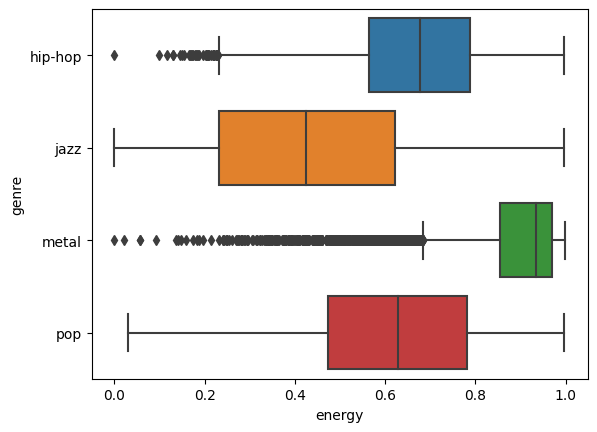

In [ ]:
#Python
temp = song_data[song_data.genre.isin(['pop', 'metal', 'jazz', 'hip-hop'])]
sns.boxplot(temp, x='energy', y='genre')

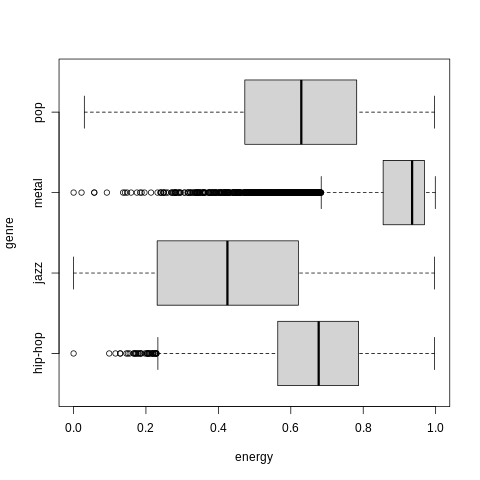

In [ ]:
%%R
temp <- subset(song_data, genre == 'pop' | genre == 'metal'| genre == 'jazz' | genre == 'hip-hop')
temp$genre <- factor(temp$genre)
boxplot(energy~genre, data=temp, horizontal=TRUE)

## **STRIPCHART**

**Stripchart** (*одномерная диаграмма рассеяния*) - одна из альтернатив для диаграммы размахов.

С помощью этой диаграммы сравним, какие жанры музыки больше подходят для танцев. Для простоты визуализации, ограничимся теми же четырьмя музыкальными жанрами.

<Axes: xlabel='genre', ylabel='danceability'>

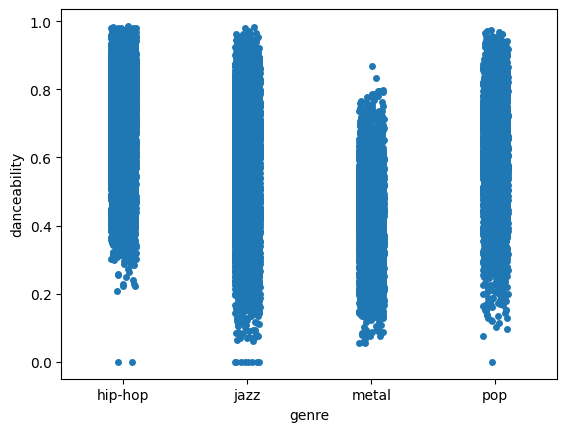

In [ ]:
#Python
temp = song_data[song_data.genre.isin(['pop', 'metal', 'jazz', 'hip-hop'])]
sns.stripplot(y=temp.danceability, x=temp.genre, size=5)

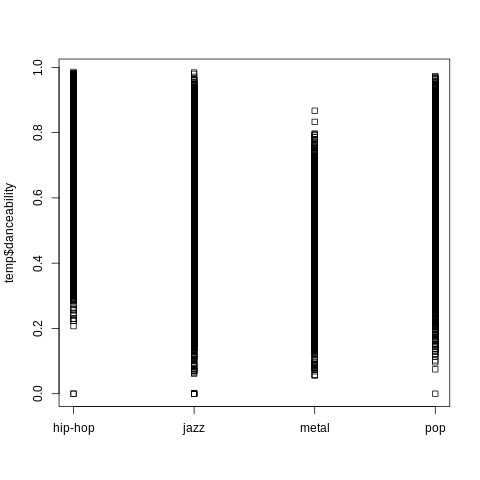

In [ ]:
%%R
temp <- subset(song_data, genre == 'pop' | genre == 'metal'| genre == 'jazz' | genre == 'hip-hop')
stripchart(temp$danceability~temp$genre, vertical=TRUE)

Статистически, музыка жанра хип-хоп и поп имеют больший показатель danceability; по признаку danceability джаз имеет наибольший разброс; метал менее пригоден для танцев.

# **3. Проверка данных на выбросы**

Как критерий Граббса, так и Q-тест Диксона основаны на предположении о том, что выборка распределена нормально. В пункте 6 показано, что для всех количественных признаков гипотеза о нормальности распределения отвергается, поэтому данные методы нахождения выбросов, вообще говоря, неприменимы, однако мы всё же попробуем применить эти статистические критерии к признаку duration. "На глаз" плотность распределения длительности песни похожа на плотность нормального распределения, однако следует понимать, что результат нужно интерпретировать с осторожностью.

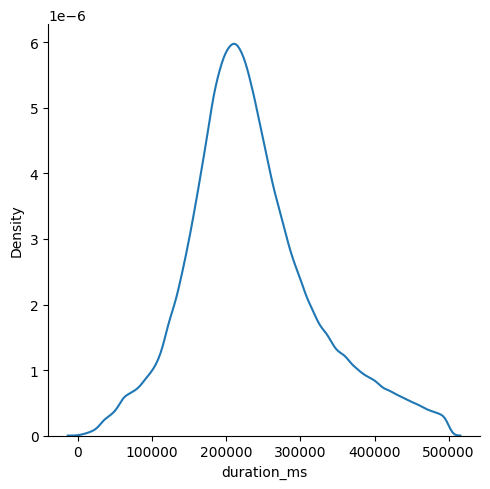

In [ ]:
#Python

sns.displot(song_data[song_data.duration_ms <= 500000], x='duration_ms', kind='kde')

### **Критерий Граббса**

In [ ]:
#Python
from outliers import smirnov_grubbs as grubbs
outliers = song_data.iloc[grubbs.max_test_indices(song_data['duration_ms'], alpha=0.05)]
outliers

,Unnamed: 0,artist_name,track_name,track_id,popularity,year,genre,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
157171,157171,Nature Sounds,Babbling Brook Close Up,7gTgu4Jij9kWjzGlno4cvZ,7,2014,sleep,0.381,0.997,5,-18.974,0,0.1100,0.9300,0.899,0.970,0.01510,106.589,6000495,1
103376,103376,Nature Sounds,Rainstorm Ambience with Thunder Rolls and Peels,0tFT1PFYKfjBGDTZlivRfY,14,2013,sleep,0.152,0.947,11,-24.524,0,0.0754,0.0667,0.910,0.817,0.00829,135.853,6000461,3


Критерий Граббса выявил два выброса. Они относятся к жанру "sleep", то есть музыка/звуки для сна. Каждая из аудиодорожек длится 100 минут.

In [ ]:
#Python
#перевод миллисекунд в минуты
outliers['duration_ms'] / 60000

157171    100.008250
103376    100.007683
Name: duration_ms, dtype: float64

In [ ]:
%%R
grubbs.test(song_data$duration_ms)


	Grubbs test for one outlier

data:  song_data$duration_ms
G = 38.48679, U = 0.99872, p-value < 2.2e-16
alternative hypothesis: highest value 6000495 is an outlier



Малое значение $p_{\text{value}} \implies$ максимальное значение 6000495 мс является выбросом.

In [ ]:
%%R
song_data[song_data$duration_ms == 6000495, ]

            X   artist_name              track_name               track_id
157172 157171 Nature Sounds Babbling Brook Close Up 7gTgu4Jij9kWjzGlno4cvZ
       popularity year genre danceability energy key loudness mode speechiness
157172          7 2014 sleep        0.381  0.997   5  -18.974    0        0.11
       acousticness instrumentalness liveness valence   tempo duration_ms
157172         0.93            0.899     0.97  0.0151 106.589     6000495
       time_signature
157172              1


Как можно заметить, это та же аудиодорожка, которая была выявлена выше.

In [ ]:
%%R
#перевод миллисекунд в минуты
song_data[song_data$duration_ms == 6000495, ]$duration_ms / 60000

[1] 100.0083


### **Q-тест Диксона**

Q-тест Диксона может работать с выборкой размера $3 \leqslant n \leqslant 30$, поэтому ограничим размер рассматриваемой выборки. Как было показано выше, предполагаемый выброс содержится в строке с номером 157171. Возьмём теперь все строки в датасете с номерами $157156 \leqslant n \leqslant 157186$, тогда в рассматриваемой выборке будет 30 элементов.

In [ ]:
#Python
temp = song_data.iloc[157156:157186].duration_ms

In [ ]:
%%R
temp <- song_data %>% slice(157157:157186)
temp <- temp$duration_ms

Я не нашёл реализацию Q-теста Диксона в Python, поэтому проведу этот тест вручную.

Для проведения теста нужно вычислить следующее значение:

$$Q = \frac{\text{gap}}{\text{range}},$$
где gap - модуль разности между предполагаемым выбросным значением и ближайшей к ней точкой, а range - разница между максимальным и минимальным элементами выборки.

Далее необходимо найти запись с табличным значением $Q_{\text{table}}$, соответствующее размеру выборки ($n=30$) и уровню доверия (95%). В случае, если $Q > Q_{\text{table}}$, предполагаемое значение действительно считается выбросом.

In [ ]:
#Python

def q_stat(data):
  data.sort()
  return abs((data[-1] - data[-2]) / (data[0] - data[-1]))

q_stat(temp.to_numpy())

0.9106196645893758

Найдем теперь в табличке критическое значение, соответствующее уровню доверия 95%:

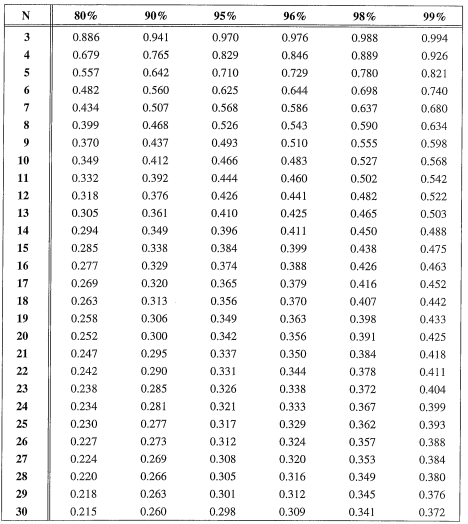

$Q_{\text{table}} = 0.298 < Q \approx 0.91$, где $Q$ - значение, полученное на основании выборки, поэтому максимальное значение выборки, согласно тесту Диксона, является выбросом.

In [ ]:
%%R
dixon.test(temp, two.sided=FALSE)


	Dixon test for outliers

data:  temp
Q = 0.94094, p-value < 2.2e-16
alternative hypothesis: highest value 6000495 is an outlier



Q-тест Диксона также подтвердил, что максимальное значение выборки является выбросом.

# **4. Заполнение пропусков в данных**

Можно убедиться, что в датасете нет пропусков:

In [ ]:
#Python
song_data.isna().value_counts()

Unnamed: 0  artist_name  track_name  track_id  popularity  year   genre  danceability  energy  key    loudness  mode   speechiness  acousticness  instrumentalness  liveness  valence  tempo  duration_ms  time_signature
False       False        False       False     False       False  False  False         False   False  False     False  False        False         False             False     False    False  False        False             1159764
dtype: int64

In [ ]:
%%R
anyNA(song_data)

[1] FALSE


По этой причине, создадим их искусственно и заполним их.
Сразу будем заполнять пропуски *скользящим средним* (среднее арифметическое соседних значений).
Будем рассматривать количество выпущенных за год треков, как в пункте *dotchart*.

In [ ]:
#Python
temp = song_data.copy()
temp = temp.value_counts('year').sort_index()
temp[2002] = (temp[2001] + temp[2003]) / 2
temp[2006] = (temp[2005] + temp[2007]) / 2
temp[2010] = (temp[2009] + temp[2011]) / 2
temp[2018] = (temp[2017] + temp[2019]) / 2

In [ ]:
%%R
temp <- song_data %>% count(year)
temp <- temp[['n']]
temp[3] <- (temp[2] + temp[3]) / 2
temp[7] <- (temp[6] + temp[8]) / 2
temp[11] <- (temp[10] + temp[12]) / 2
temp[19] <- (temp[18] + temp[20]) / 2

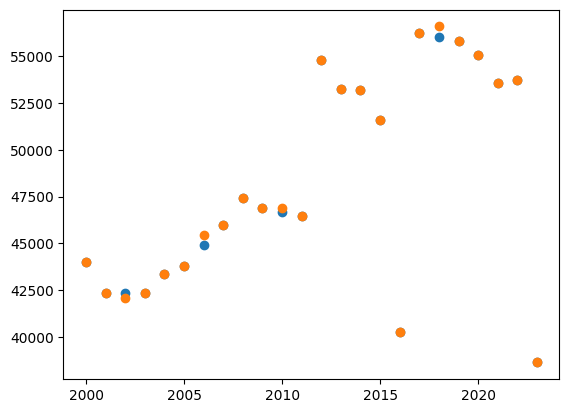

In [ ]:
#Python
plt.scatter(x=np.array([i for i in range (2000,2024)]), y=temp)

#график с исходными данными (для сравнения)
temp = song_data.value_counts('year').sort_index()
plt.scatter(x=np.array([i for i in range (2000,2024)]), y=temp)

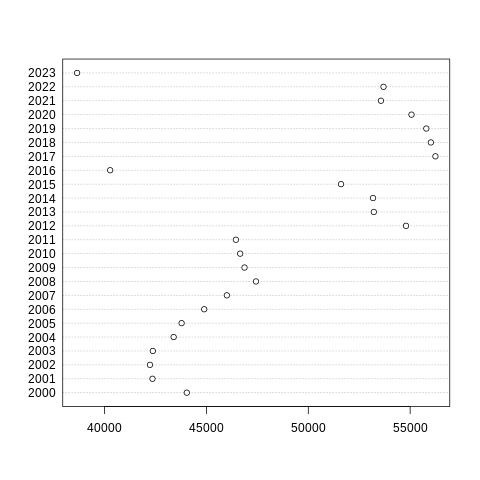

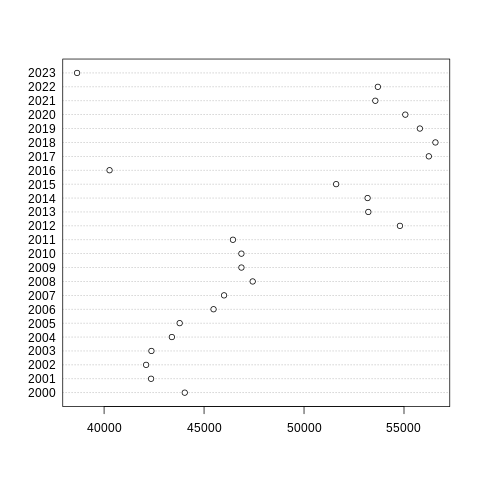

In [ ]:
%%R
year_arr <- song_data %>% count(year)
dotchart(temp, year_arr$year)
dotchart(year_arr$n, year_arr$year)

# **5. Генерация данных из нормального распределения и их анализ**

In [ ]:
#Python

#малая выборка с разными параметрами
data1 = np.random.normal(loc=0.0, scale=1.0, size=100)
data2 = np.random.normal(loc=5.0, scale=4.0, size=100)
#умеренная выборка с разными параметрами
data3 = np.random.normal(loc=0.0, scale=1.0, size=5000)
data4 = np.random.normal(loc=5.0, scale=4.0, size=5000)

In [ ]:
%%R
#малая выборка с разными параметрами
data1 <- rnorm(100, 0, 1)
data2 <- rnorm(100, 5, 4)
#умеренная выборка с разными параметрами
data3 <- rnorm(5000, 0, 1)
data4 <- rnorm(5000, 5, 4)

## Эмпирические функции распределения

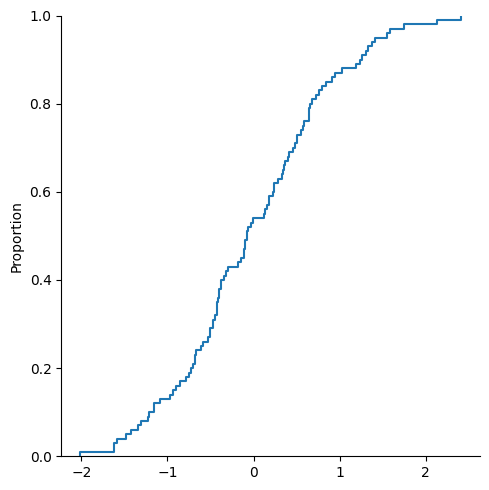

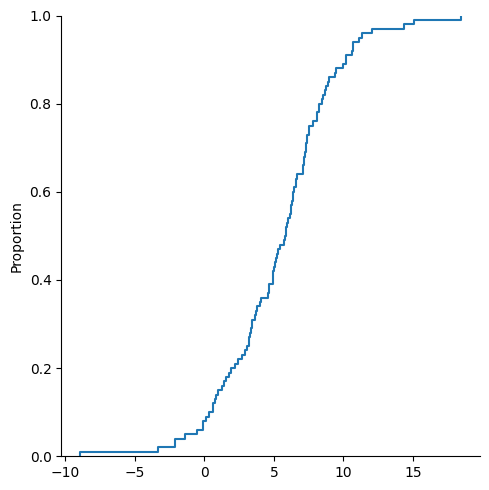

In [ ]:
#Python
sns.displot(data=data1, kind="ecdf")
sns.displot(data=data2, kind="ecdf")

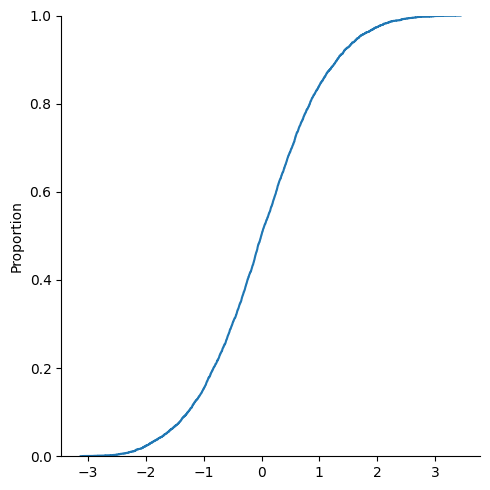

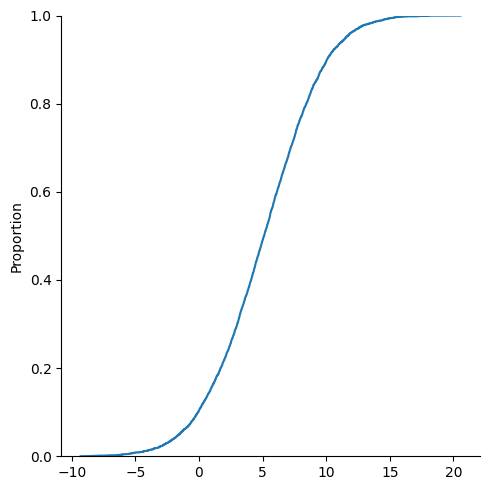

In [ ]:
#Python
sns.displot(data=data3, kind="ecdf")
sns.displot(data=data4, kind="ecdf")

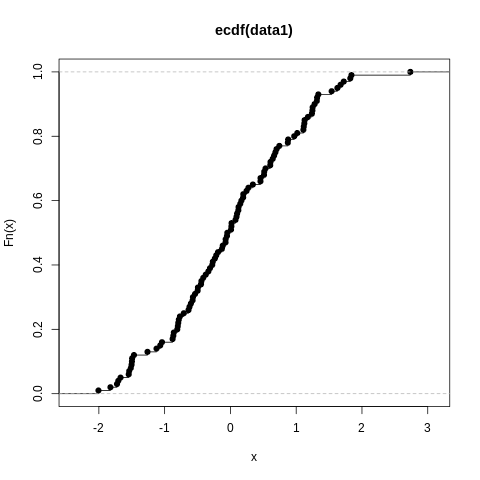

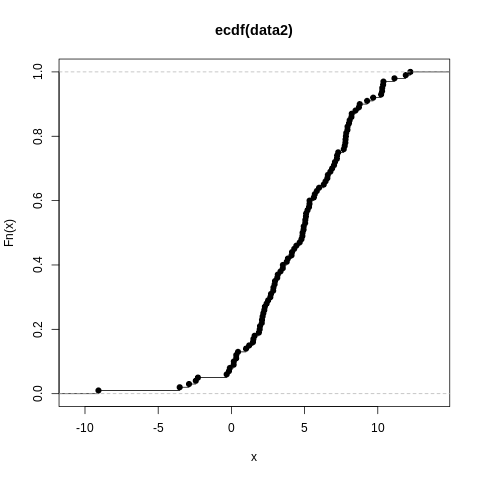

In [ ]:
%%R
plot(ecdf(data1))
plot(ecdf(data2))

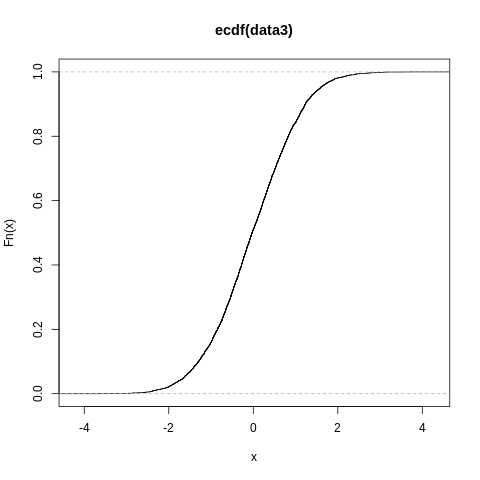

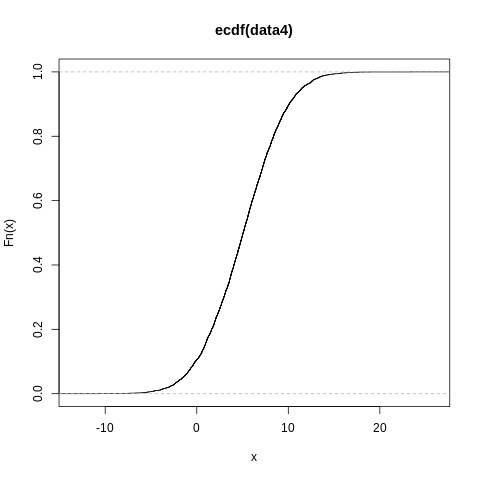

In [ ]:
%%R
plot(ecdf(data3))
plot(ecdf(data4))

## Графики квантилей

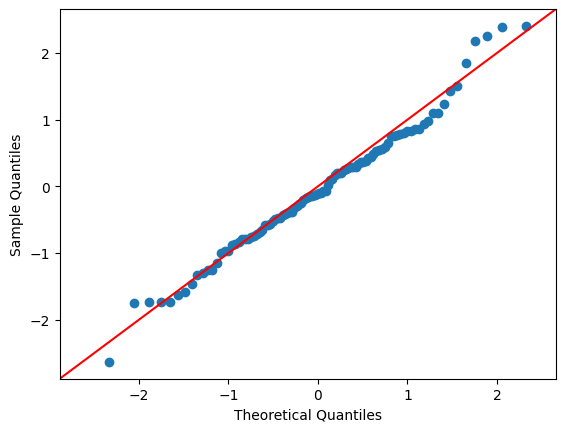

In [ ]:
#Python
import statsmodels.api as sm
import pylab as py

sm.qqplot(data1, line='45')
py.show()

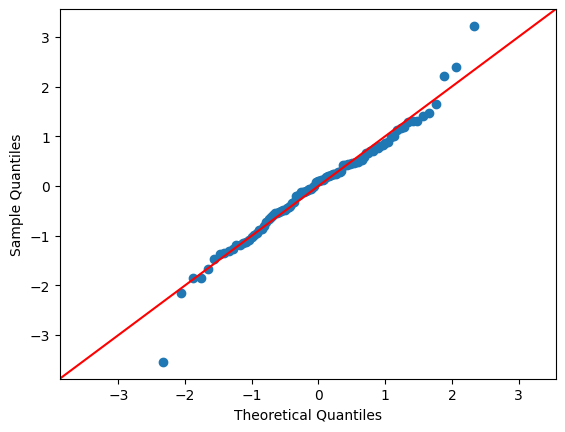

In [ ]:
#Python
sm.qqplot((data2 - data2.mean()) / np.std(data2), line='45')
py.show()

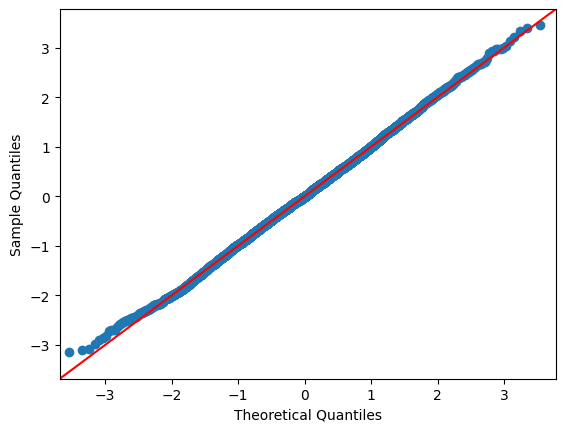

In [ ]:
#Python
sm.qqplot(data3, line='45')
py.show()

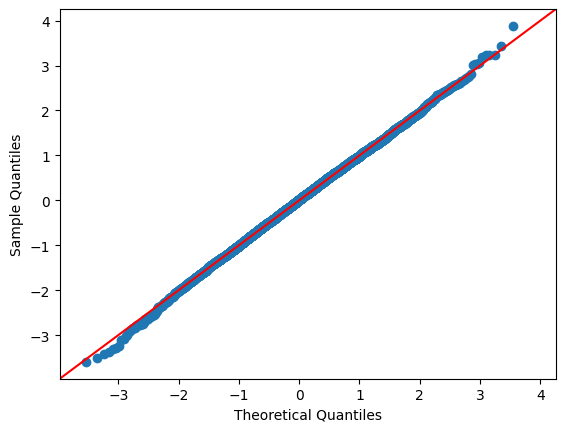

In [ ]:
#Python
sm.qqplot((data4 - data4.mean()) / np.std(data4), line='45')
py.show()

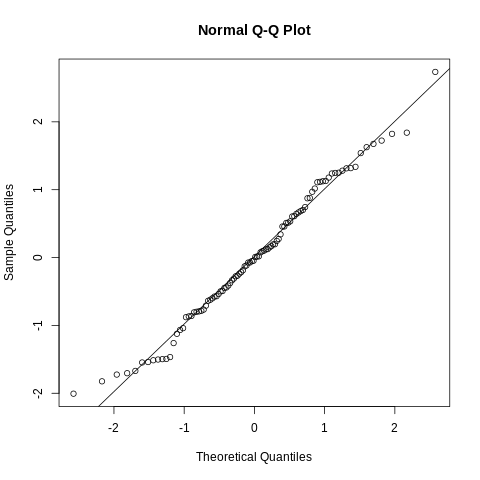

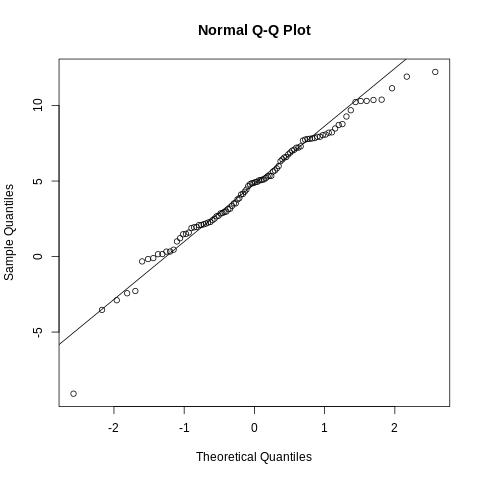

In [ ]:
%%R
qqnorm(data1)
qqline(data1)
qqnorm(data2)
qqline(data2)

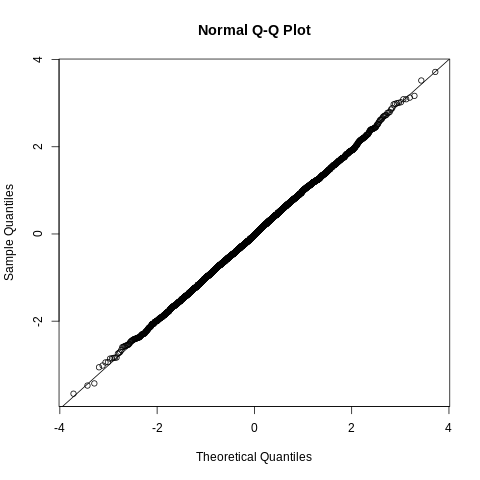

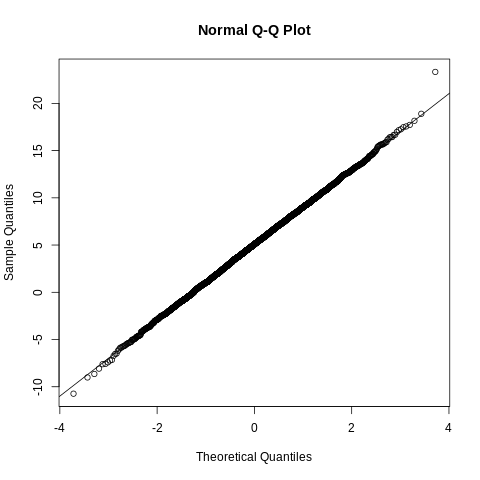

In [ ]:
%%R
qqnorm(data3)
qqline(data3)
qqnorm(data4)
qqline(data4)

##Метод огибающих

Нашёл реализацию метода огибающих только в R.

In [ ]:
%%R
install.packages("car")

[1] 96 94


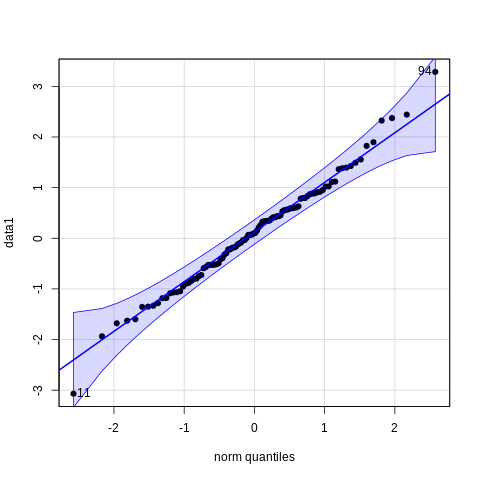

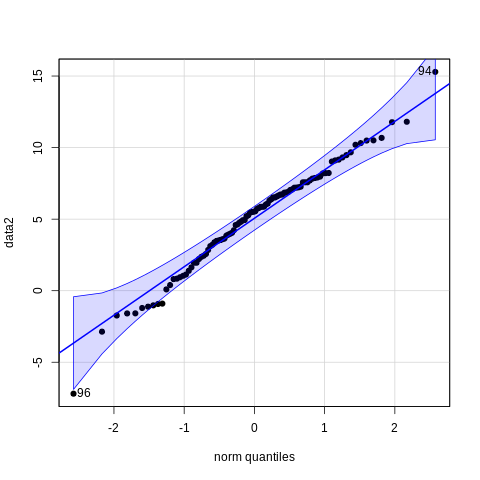

In [ ]:
%%R
library(car)
qqPlot(data1, dist= "norm", pch=19)
qqPlot(data2, dist= "norm", pch=19)

[1] 2485  264


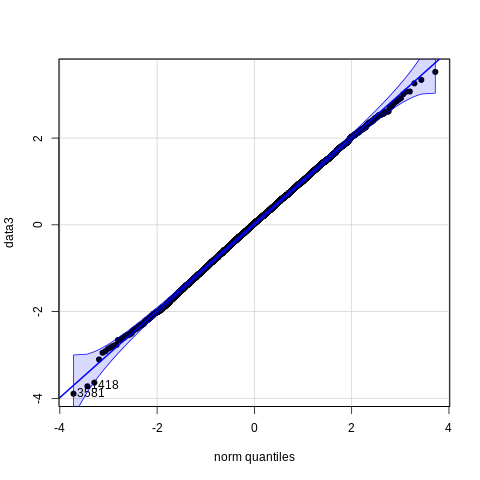

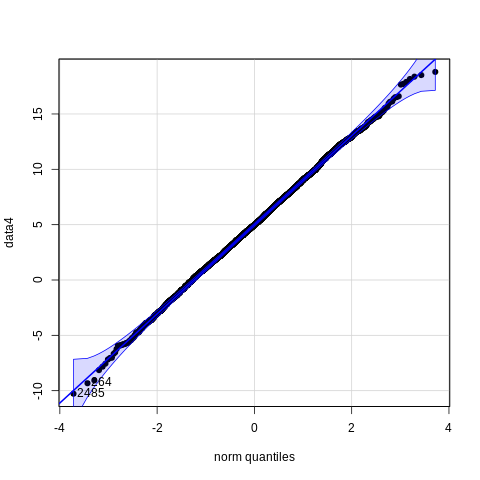

In [ ]:
%%R
qqPlot(data3, dist= "norm", pch=19)
qqPlot(data4, dist= "norm", pch=19)

## Процедуры проверки нормальности

### Критерий Колмогорова-Смирнова

In [ ]:
#Python

print(sp.stats.kstest(data1, 'norm'))
print(sp.stats.kstest((data2 - data2.mean()) / np.std(data2), 'norm'))
print(sp.stats.kstest(data3, 'norm'))
print(sp.stats.kstest((data4 - data4.mean()) / np.std(data4), 'norm'))

KstestResult(statistic=0.05878992292883545, pvalue=0.8595636999391937, statistic_location=0.6783026073218973, statistic_sign=1)
KstestResult(statistic=0.06372218804024599, pvalue=0.7874015976377289, statistic_location=-0.1162626622722099, statistic_sign=-1)
KstestResult(statistic=0.010562472307804383, pvalue=0.6284769452887478, statistic_location=-0.4455463877374204, statistic_sign=-1)
KstestResult(statistic=0.008009528016007184, pvalue=0.9028291028116177, statistic_location=0.4868269869628605, statistic_sign=-1)


Везде p_value > 0.05; выборка распределена нормально, согласно данному критерию.

In [ ]:
%%R
print(ks.test(data1, pnorm, mean=mean(data1), sd=sd(data1)))
print(ks.test(data2, pnorm, mean=mean(data2), sd=sd(data2)))
print(ks.test(data3, pnorm, mean=mean(data3), sd=sd(data3)))
print(ks.test(data4, pnorm, mean=mean(data4), sd=sd(data4)))


	Asymptotic one-sample Kolmogorov-Smirnov test

data:  data1
D = 0.055903, p-value = 0.9135
alternative hypothesis: two-sided


	Asymptotic one-sample Kolmogorov-Smirnov test

data:  data2
D = 0.04548, p-value = 0.9858
alternative hypothesis: two-sided


	Asymptotic one-sample Kolmogorov-Smirnov test

data:  data3
D = 0.0076407, p-value = 0.9322
alternative hypothesis: two-sided


	Asymptotic one-sample Kolmogorov-Smirnov test

data:  data4
D = 0.0072823, p-value = 0.9536
alternative hypothesis: two-sided



### Критерий Шапиро-Уилка

In [ ]:
#Python

print(sp.stats.shapiro(data1))
print(sp.stats.shapiro(data2))
print(sp.stats.shapiro(data3))
print(sp.stats.shapiro(data4))

ShapiroResult(statistic=0.9922902584075928, pvalue=0.8418359160423279)
ShapiroResult(statistic=0.9818146824836731, pvalue=0.183629110455513)
ShapiroResult(statistic=0.9993362426757812, pvalue=0.061786994338035583)
ShapiroResult(statistic=0.9996005296707153, pvalue=0.41766828298568726)


In [ ]:
%%R

print(shapiro.test(data1))
print(shapiro.test(data2))
print(shapiro.test(data3))
print(shapiro.test(data4))


	Shapiro-Wilk normality test

data:  data1
W = 0.9862, p-value = 0.3861


	Shapiro-Wilk normality test

data:  data2
W = 0.97758, p-value = 0.08594


	Shapiro-Wilk normality test

data:  data3
W = 0.99971, p-value = 0.7278


	Shapiro-Wilk normality test

data:  data4
W = 0.99974, p-value = 0.8107



Снова можно сделать вывод о том, что выборка распределена нормально (во всех тестах p_value > 0.05)

### Критерий Андерсона-Дарлинга

In [ ]:
#Python
print(sp.stats.anderson(data1))
print(sp.stats.anderson(data2))
print(sp.stats.anderson(data3))
print(sp.stats.anderson(data4))

AndersonResult(statistic=0.2167045012517974, critical_values=array([0.555, 0.632, 0.759, 0.885, 1.053]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]), fit_result=  params: FitParams(loc=-0.0076554208543901355, scale=0.8868605038971641)
 success: True
 message: '`anderson` successfully fit the distribution to the data.')
AndersonResult(statistic=0.44433910716503533, critical_values=array([0.555, 0.632, 0.759, 0.885, 1.053]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]), fit_result=  params: FitParams(loc=5.414731604453082, scale=4.071169985562263)
 success: True
 message: '`anderson` successfully fit the distribution to the data.')
AndersonResult(statistic=0.5456519376566575, critical_values=array([0.576, 0.655, 0.786, 0.917, 1.091]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]), fit_result=  params: FitParams(loc=0.010627303527978174, scale=1.000439718266194)
 success: True
 message: '`anderson` successfully fit the distribution to the data.')
Anders

Сравнивая значения статистик с critical values при различных уровнях значимости, приходим к выводу, что гипотеза о нормальности выборки не отвергается.

In [ ]:
%%R
print(ad.test(data1))
print(ad.test(data2))
print(ad.test(data3))
print(ad.test(data4))


	Anderson-Darling normality test

data:  data1
A = 0.31929, p-value = 0.5292


	Anderson-Darling normality test

data:  data2
A = 0.34403, p-value = 0.4811


	Anderson-Darling normality test

data:  data3
A = 0.41914, p-value = 0.3268


	Anderson-Darling normality test

data:  data4
A = 0.24222, p-value = 0.7696



Здесь выводы снова делаются на основании p_value.

### Критерий Крамера фон Мизеса

In [ ]:
#Python
print(sp.stats.cramervonmises(data1, 'norm'))
print(sp.stats.cramervonmises((data2 - data2.mean()) / np.std(data2), 'norm'))
print(sp.stats.cramervonmises(data3, 'norm'))
print(sp.stats.cramervonmises((data4 - data4.mean()) / np.std(data4), 'norm'))

CramerVonMisesResult(statistic=0.07296731097508395, pvalue=0.7345954228448915)
CramerVonMisesResult(statistic=0.06682456779763914, pvalue=0.7723187886568241)
CramerVonMisesResult(statistic=0.09144689952043011, pvalue=0.6284669107106733)
CramerVonMisesResult(statistic=0.06298863417424261, pvalue=0.7951942079507429)


In [ ]:
%%R
print(cvm.test(data1))
print(cvm.test(data2))
print(cvm.test(data3))
print(cvm.test(data4))


	Cramer-von Mises normality test

data:  data1
W = 0.03644, p-value = 0.7433


	Cramer-von Mises normality test

data:  data2
W = 0.04313, p-value = 0.62


	Cramer-von Mises normality test

data:  data3
W = 0.066886, p-value = 0.3072


	Cramer-von Mises normality test

data:  data4
W = 0.039851, p-value = 0.6847



p_values во всех тестах больше 0.05, следовательно гипотеза о нормальности выборки не отвергается.

### Критерий Колмогорова-Смирнова в модификации Лиллиефорса

In [ ]:
#Python
import statsmodels

print(statsmodels.stats.diagnostic.lilliefors(data1, 'norm'))
print(statsmodels.stats.diagnostic.lilliefors(data2, 'norm'))
print(statsmodels.stats.diagnostic.lilliefors(data3, 'norm'))
print(statsmodels.stats.diagnostic.lilliefors(data4, 'norm'))

(0.060759392221760244, 0.48474766255037544)
(0.0639531229940613, 0.4092057497572874)
(0.008794445355754688, 0.4648186178025324)
(0.007992275693591067, 0.6172575479940872)


Здесь за p_value отвечает второй элемент tuple.

In [ ]:
%%R

print(lillie.test(data1))
print(lillie.test(data2))
print(lillie.test(data3))
print(lillie.test(data4))


	Lilliefors (Kolmogorov-Smirnov) normality test

data:  data1
D = 0.055903, p-value = 0.6191


	Lilliefors (Kolmogorov-Smirnov) normality test

data:  data2
D = 0.04548, p-value = 0.8787


	Lilliefors (Kolmogorov-Smirnov) normality test

data:  data3
D = 0.0076407, p-value = 0.6828


	Lilliefors (Kolmogorov-Smirnov) normality test

data:  data4
D = 0.0072823, p-value = 0.751



# **6. Анализ данных с помощью графиков квантилей, метода огибающих, процедур проверки гипотез о нормальности**

## Графики квантилей

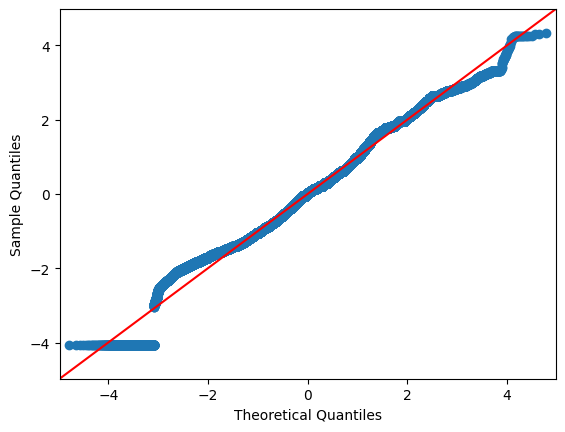

In [ ]:
#Python
test_data = song_data['tempo']
sm.qqplot((test_data - test_data.mean()) / np.std(test_data), line='45')
py.show()

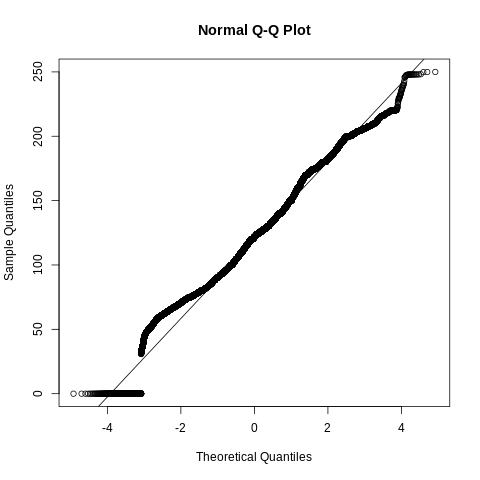

In [ ]:
%%R
test_data <- song_data$tempo
qqnorm(test_data)
qqline(test_data)

"На глаз", согласно графику квантилей, распределение темпа похоже на нормальное.

## Метод огибающих

[1] 1144981  911441


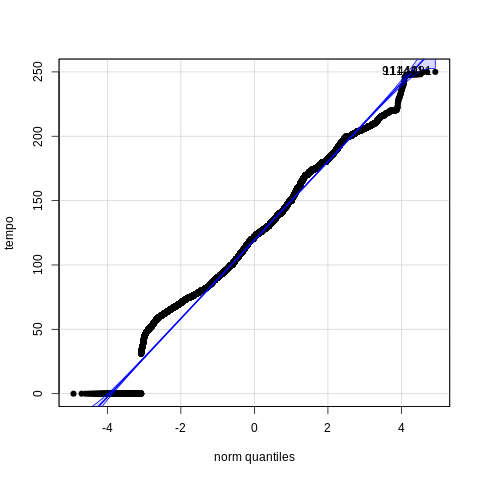

In [ ]:
%%R
test_data <- song_data$tempo
qqPlot(test_data, dist= "norm", pch=19, ylab='tempo')

Однако большая часть графика квантилей не попадает в доверительные огибающие. Это говорит в пользу того, что темп не распределён нормально.

[1] 157172 103377


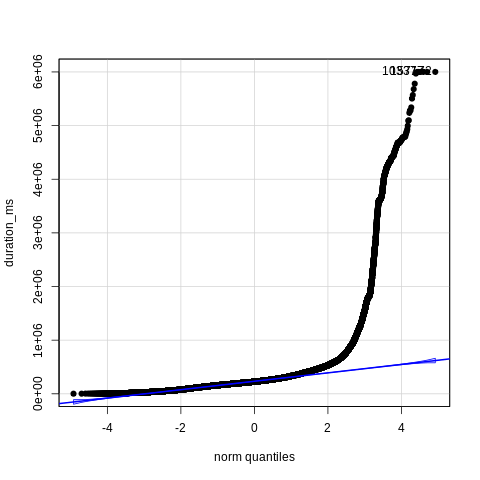

In [ ]:
%%R
test_data <- song_data$duration_ms
qqPlot(test_data, dist= "norm", pch=19, ylab='duration_ms')

То же самое можно сказать про распределение длительности песен.

## Процедуры проверки нормальности

### Критерий Колмогорова-Смирнова

In [ ]:
#Python
test_data = song_data['acousticness']
print(sp.stats.kstest((test_data - test_data.mean()) / np.std(test_data), 'norm'))

KstestResult(statistic=0.19200589159009496, pvalue=0.0, statistic_location=-0.5902664652488517, statistic_sign=1)


In [ ]:
%%R
test_data <- song_data$acousticness
print(ks.test(test_data, pnorm, mean=mean(test_data), sd=sd(test_data)))


	Asymptotic one-sample Kolmogorov-Smirnov test

data:  test_data
D = 0.19201, p-value < 2.2e-16
alternative hypothesis: two-sided



p_value = 0 $\implies$ гипотеза о нормальности распределения признака acousticness отвергается.

In [ ]:
#Python
test_data = song_data['valence']
print(sp.stats.kstest((test_data - test_data.mean()) / np.std(test_data), 'norm'))

KstestResult(statistic=0.056533865519317106, pvalue=0.0, statistic_location=-0.7990633924404493, statistic_sign=1)


In [ ]:
%%R
test_data <- song_data$valence
print(ks.test(test_data, pnorm, mean=mean(test_data), sd=sd(test_data)))


	Asymptotic one-sample Kolmogorov-Smirnov test

data:  test_data
D = 0.056534, p-value < 2.2e-16
alternative hypothesis: two-sided



Аналогичные выводы можно сделать про признак valence.

### Критерий Шапиро-Уилка

Для применения критерия Шапиро-Уилка размер выборки должен быть не больше 5000.

In [ ]:
#Python
test_data = np.sort(song_data['danceability'].to_numpy())
test_data = test_data[test_data.shape[0]//2:test_data.shape[0]//2 + 4999]
print(sp.stats.shapiro(test_data))
print(test_data.shape[0]//2,test_data.shape[0]//2 + 4999)

ShapiroResult(statistic=0.7794421911239624, pvalue=0.0)
2499 7498


In [ ]:
%%R
test_data <- song_data$danceability
test_data <- sort(test_data)
test_data <- test_data[2499:7498]
print(shapiro.test(test_data))


	Shapiro-Wilk normality test

data:  test_data
W = 0.95771, p-value < 2.2e-16



Для срезки данных из признака danceability критерий Шапиро-Уилка показал, что гипотеза о нормальности отвергается.

### Критерий Андерсона-Дарлинга

In [ ]:
#Python
test_data = song_data['energy']
print(sp.stats.anderson(test_data))

AndersonResult(statistic=22621.30139581114, critical_values=array([0.576, 0.656, 0.787, 0.918, 1.092]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]), fit_result=  params: FitParams(loc=0.6396698993142569, scale=0.2705008810656706)
 success: True
 message: '`anderson` successfully fit the distribution to the data.')


Сравниваем значение статистики с критическими значениями: видим, что statistic больше $\implies$ отвергаем гипотезу о нормальности.

In [ ]:
%%R
test_data <- song_data$energy
print(ad.test(test_data))


	Anderson-Darling normality test

data:  test_data
A = 22621, p-value < 2.2e-16



Маленькое p_value $\implies$ отвергаем гипотезу о нормальности.

### Критерий Крамера фон Мизеса

In [ ]:
#Python
test_data = song_data['loudness']
print(sp.stats.cramervonmises((test_data - test_data.mean()) / np.std(test_data), 'norm'))

CramerVonMisesResult(statistic=8714.639560867621, pvalue=0)


/usr/local/lib/python3.10/dist-packages/scipy/stats/_hypotests.py:395: RuntimeWarning: overflow encountered in double_scalars
  e3 = 2 * (m + 2) * gamma(k + 3/2) * _ed3((4 * k + 5) / sx) / (12 * y2)
/usr/local/lib/python3.10/dist-packages/scipy/stats/_hypotests.py:393: RuntimeWarning: overflow encountered in double_scalars
  e1 = m * gamma(k + 1/2) * _ed2((4 * k + 3)/sx) / (9 * y1)
/usr/local/lib/python3.10/dist-packages/scipy/stats/_hypotests.py:396: RuntimeWarning: overflow encountered in double_scalars
  e4 = 7 * m * gamma(k + 1/2) * _ed2((4 * k + 1) / sx) / (144 * y1)
/usr/local/lib/python3.10/dist-packages/scipy/stats/_hypotests.py:397: RuntimeWarning: overflow encountered in double_scalars
  e5 = 7 * m * gamma(k + 1/2) * _ed2((4 * k + 5) / sx) / (144 * y1)
/usr/local/lib/python3.10/dist-packages/scipy/stats/_hypotests.py:406: RuntimeWarning: invalid value encountered in divide
  z = -_Ak(k, x[cond]) / (np.pi * gamma(k + 1))


In [ ]:
%%R
test_data <- song_data$loudness
print(cvm.test(test_data))


	Cramer-von Mises normality test

data:  test_data
W = 8714.6, p-value = 7.37e-10



Гипотеза о нормальности отвергается вследствие малости p_value.

### Критерий Колмогорова-Смирнова в модификации Лиллиефорса

In [ ]:
#Python
import statsmodels

test_data = song_data['liveness']
print(statsmodels.stats.diagnostic.lilliefors(test_data, 'norm'))

(0.20023410606492187, 0.0009999999999998899)


In [ ]:
%%R
test_data <- song_data$liveness
print(lillie.test(test_data))


	Lilliefors (Kolmogorov-Smirnov) normality test

data:  test_data
D = 0.20023, p-value < 2.2e-16



Снова отвергаем гипотезу о нормальности из-за малого p_value.

# **7. Проверка гипотез**

### Критерий Стьюдента

Для применения данного критерия необходимо, чтобы:
сравниваемые выборки должны происходить из нормально распределенных

*   сравниваемые выборки были распределены нормально;
*   дисперсии сравниваемых генеральных совокупностей должны быть равны.

В наших данных это требование не выполняется, поэтому проведём проверку гипотез на синтетических данных.

In [127]:
#Python
data1 = np.random.normal(loc=0.0, scale=20.0, size=1000)
data2 = np.random.normal(loc=2.0, scale=20.0, size=1000)

In [128]:
%%R
data1 <- rnorm(1000, 0, 20)
data2 <- rnorm(1000, 2, 20)

#### Доверительный уровень 0.9:

In [129]:
#Python
from pingouin import ttest

ttest(data1, data2, alternative='two-sided', confidence=0.9)

,T,dof,alternative,p-val,CI90%,cohen-d,BF10,power
T-test,-2.532801,1998,two-sided,0.011391,"[-3.7826866256317375, -0.8031603716034063]",0.11327,1.208,0.716214


In [130]:
#Python
ttest(data1, data2, alternative='greater', confidence=0.9)

,T,dof,alternative,p-val,CI90%,cohen-d,BF10,power
T-test,-2.532801,1998,greater,0.994304,"[-3.4534852494838253, inf]",0.11327,0.414,0.000015


In [131]:
%%R
print(t.test(data1, data2, alternative='two.sided', conf.level = 0.9))
print(t.test(data1, data2, alternative='greater', conf.level = 0.9))


	Welch Two Sample t-test

data:  data1 and data2
t = -0.6774, df = 1997.3, p-value = 0.4982
alternative hypothesis: true difference in means is not equal to 0
90 percent confidence interval:
 -2.048890  0.853961
sample estimates:
mean of x mean of y 
0.4093678 1.0068321 


	Welch Two Sample t-test

data:  data1 and data2
t = -0.6774, df = 1997.3, p-value = 0.7509
alternative hypothesis: true difference in means is greater than 0
90 percent confidence interval:
 -1.72816      Inf
sample estimates:
mean of x mean of y 
0.4093678 1.0068321 



In [132]:
%%R
print(power.t.test(n = 1000, delta = 2, sd = 20, sig.level = 0.1,
                   type = "two.sample", alternative = "two.sided"))
print(power.t.test(n = 1000, delta = 2, sd = 20, sig.level = 0.1,
                   type = "two.sample", alternative = "one.sided"))


     Two-sample t test power calculation 

              n = 1000
          delta = 2
             sd = 20
      sig.level = 0.1
          power = 0.7225579
    alternative = two.sided

NOTE: n is number in *each* group


     Two-sample t test power calculation 

              n = 1000
          delta = 2
             sd = 20
      sig.level = 0.1
          power = 0.8299726
    alternative = one.sided

NOTE: n is number in *each* group



#### Доверительный уровень 0.95:

In [133]:
#Python
ttest(data1, data2, alternative='two-sided', confidence=0.95)

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,-2.532801,1998,two-sided,0.011391,"[-4.07, -0.52]",0.11327,1.208,0.716214


In [134]:
#Python
ttest(data1, data2, alternative='greater', confidence=0.95)

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,-2.532801,1998,greater,0.994304,"[-3.78, inf]",0.11327,0.414,0.000015


In [135]:
%%R
print(t.test(data1, data2, alternative='two.sided', conf.level = 0.95))
print(t.test(data1, data2, alternative='greater', conf.level = 0.95))


	Welch Two Sample t-test

data:  data1 and data2
t = -0.6774, df = 1997.3, p-value = 0.4982
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -2.327190  1.132262
sample estimates:
mean of x mean of y 
0.4093678 1.0068321 


	Welch Two Sample t-test

data:  data1 and data2
t = -0.6774, df = 1997.3, p-value = 0.7509
alternative hypothesis: true difference in means is greater than 0
95 percent confidence interval:
 -2.04889      Inf
sample estimates:
mean of x mean of y 
0.4093678 1.0068321 



In [136]:
%%R
print(power.t.test(n = 1000, delta = 2, sd = 20, sig.level = 0.05,
                   type = "two.sample", alternative = "two.sided"))
print(power.t.test(n = 1000, delta = 2, sd = 20, sig.level = 0.05,
                   type = "two.sample", alternative = "one.sided"))


     Two-sample t test power calculation 

              n = 1000
          delta = 2
             sd = 20
      sig.level = 0.05
          power = 0.6083531
    alternative = two.sided

NOTE: n is number in *each* group


     Two-sample t test power calculation 

              n = 1000
          delta = 2
             sd = 20
      sig.level = 0.05
          power = 0.7225579
    alternative = one.sided

NOTE: n is number in *each* group



#### Доверительный уровень 0.99:

In [137]:
#Python
ttest(data1, data2, alternative='two-sided', confidence=0.99)

,T,dof,alternative,p-val,CI99%,cohen-d,BF10,power
T-test,-2.532801,1998,two-sided,0.011391,"[-4.627030154208972, 0.04118315697382877]",0.11327,1.208,0.716214


In [138]:
#Python
ttest(data1, data2, alternative='greater', confidence=0.99)

,T,dof,alternative,p-val,CI99%,cohen-d,BF10,power
T-test,-2.532801,1998,greater,0.994304,"[-4.400637929149405, inf]",0.11327,0.414,0.000015


In [139]:
%%R
print(t.test(data1, data2, alternative='two.sided', conf.level = 0.99))
print(t.test(data1, data2, alternative='greater', conf.level = 0.99))


	Welch Two Sample t-test

data:  data1 and data2
t = -0.6774, df = 1997.3, p-value = 0.4982
alternative hypothesis: true difference in means is not equal to 0
99 percent confidence interval:
 -2.871505  1.676576
sample estimates:
mean of x mean of y 
0.4093678 1.0068321 


	Welch Two Sample t-test

data:  data1 and data2
t = -0.6774, df = 1997.3, p-value = 0.7509
alternative hypothesis: true difference in means is greater than 0
99 percent confidence interval:
 -2.650939       Inf
sample estimates:
mean of x mean of y 
0.4093678 1.0068321 



Здесь давайте оценим размер выборки, необходимый для достижения мощности критерия 0.99 при уровне значимости 0.01:

In [140]:
%%R
print(power.t.test(power = 0.99, delta = 2, sd = 20, sig.level = 0.01,
                   type = "two.sample", alternative = "two.sided"))
print(power.t.test(power = 0.99, delta = 2, sd = 20, sig.level = 0.01,
                   type = "two.sample", alternative = "one.sided"))


     Two-sample t test power calculation 

              n = 4807.927
          delta = 2
             sd = 20
      sig.level = 0.01
          power = 0.99
    alternative = two.sided

NOTE: n is number in *each* group


     Two-sample t test power calculation 

              n = 4330.869
          delta = 2
             sd = 20
      sig.level = 0.01
          power = 0.99
    alternative = one.sided

NOTE: n is number in *each* group



### Критерий Уилкоксона-Манна-Уитни

С помощью этого критерия можно проверять, имеют ли данные одинаковое распределение.

In [214]:
#Python
data1 = np.random.uniform(low=-100, high=100, size=100)
data2 = np.random.uniform(low=-100, high=100, size=100)
data3 = np.random.normal(loc=0.0, scale=20.0, size=100)

In [215]:
#Python
from scipy.stats import mannwhitneyu

print(mannwhitneyu(data1, data2, alternative='two-sided'))
print(mannwhitneyu(data1, data3, alternative='two-sided'))

MannwhitneyuResult(statistic=4610.0, pvalue=0.3412491638242302)
MannwhitneyuResult(statistic=4912.0, pvalue=0.8307057329068901)


In [216]:
%%R
data1 <- runif(100, min = -100, max = 100)
data2 <- runif(100, min = -100, max = 100)
data3 <- rnorm(100, 0, 20)

In [217]:
%%R
print(wilcox.test(data1, data2, mu = 0, alternative='two.sided'))
print(wilcox.test(data1, data3, mu = 0, alternative='two.sided'))


	Wilcoxon rank sum test with continuity correction

data:  data1 and data2
W = 5304, p-value = 0.4583
alternative hypothesis: true location shift is not equal to 0


	Wilcoxon rank sum test with continuity correction

data:  data1 and data3
W = 5574, p-value = 0.1611
alternative hypothesis: true location shift is not equal to 0



Следующие критерии используются для проверки
гипотез об однородности дисперсий.

### Критерий Фишера

Для этого критерия требуется, чтобы выборки имели нормальное распределение.
Основная гипотеза: дисперсии двух выборок равны.

In [229]:
#Python
data1 = np.random.normal(loc=0.0, scale=20.0, size=100)
data2 = np.random.normal(loc=0.0, scale=10.0, size=100)
data3 = np.random.normal(loc=5.0, scale=20.0, size=100)

In [234]:
#Python
import scipy.stats

def fisher(x: np.array, y: np.array):
    var_x, var_y = np.var(x), np.var(y)
    F = max(var_x, var_y) / min(var_x, var_y)
    dfn = x.shape[0]
    dfd = y.shape[0]
    p = 1 - f.cdf(F, dfn, dfd)
    print('Value of F-stat:', F)
    print('P-value:', p)

fisher(data1, data2)
fisher(data2, data3)
fisher(data1, data3)

Value of F-stat: 3.3735042438363556
P-value: 1.904149948828149e-09
Value of F-stat: 3.898927402001936
P-value: 2.8858027079081694e-11
Value of F-stat: 1.155749962113007
P-value: 0.23526216143174783


In [242]:
%%R
data1 <- rnorm(100, 0, 20)
data2 <- rnorm(100, 0, 10)
data3 <- rnorm(100, 5, 20)

print(var.test(data1, data2))
print(var.test(data2, data3))
print(var.test(data1, data3))


	F test to compare two variances

data:  data1 and data2
F = 4.0588, num df = 99, denom df = 99, p-value = 2.144e-11
alternative hypothesis: true ratio of variances is not equal to 1
95 percent confidence interval:
 2.730931 6.032329
sample estimates:
ratio of variances 
          4.058803 


	F test to compare two variances

data:  data2 and data3
F = 0.28391, num df = 99, denom df = 99, p-value = 1.371e-09
alternative hypothesis: true ratio of variances is not equal to 1
95 percent confidence interval:
 0.1910275 0.4219588
sample estimates:
ratio of variances 
         0.2839115 


	F test to compare two variances

data:  data1 and data3
F = 1.1523, num df = 99, denom df = 99, p-value = 0.4818
alternative hypothesis: true ratio of variances is not equal to 1
95 percent confidence interval:
 0.7753428 1.7126475
sample estimates:
ratio of variances 
          1.152341 



В следующих пунктах мы будем использовать те же сгенерированные данные.

### Критерий Левене

In [246]:
#Python
from scipy.stats import levene

print(levene(data1, data2))
print(levene(data2, data3))
print(levene(data1, data3))

LeveneResult(statistic=25.457009084618008, pvalue=1.0206869796651008e-06)
LeveneResult(statistic=35.47362092871979, pvalue=1.1618641487605881e-08)
LeveneResult(statistic=0.6706700497305561, pvalue=0.41380268262544784)


In [254]:
%%R
category_1 <- rep('1', 100)
category_2 <- rep('2', 100)
category_3 <- rep('3', 100)
categories <- as.factor(c(category_1, category_2))
data <- vec_norm <- c(data1, data2)
df <- data.frame(data, categories)
print(leveneTest(data ~ categories, df))

categories <- as.factor(c(category_2, category_3))
data <- vec_norm <- c(data2, data3)
df <- data.frame(data, categories)
print(leveneTest(data ~ categories, df))

categories <- as.factor(c(category_1, category_3))
data <- vec_norm <- c(data1, data3)
df <- data.frame(data, categories)
print(leveneTest(data ~ categories, df))

Levene's Test for Homogeneity of Variance (center = median)
       Df F value   Pr(>F)    
group   1  32.013 5.31e-08 ***
      198                     
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1
Levene's Test for Homogeneity of Variance (center = median)
       Df F value   Pr(>F)    
group   1  24.324 1.72e-06 ***
      198                     
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1
Levene's Test for Homogeneity of Variance (center = median)
       Df F value Pr(>F)
group   1  0.5082 0.4768
      198               


### Критерий Бартлетта

In [255]:
#Python
from scipy.stats import bartlett

print(bartlett(data1, data2))
print(bartlett(data2, data3))
print(bartlett(data1, data3))

BartlettResult(statistic=34.365827293717395, pvalue=4.5667148544302e-09)
BartlettResult(statistic=42.45819952369705, pvalue=7.220905970494481e-11)
BartlettResult(statistic=0.5155162807045691, pvalue=0.4727606013396529)


In [256]:
%%R

categories <- as.factor(c(category_1, category_2))
data <- vec_norm <- c(data1, data2)
df <- data.frame(data, categories)
print(bartlett.test(data ~ categories, df))

categories <- as.factor(c(category_2, category_3))
data <- vec_norm <- c(data2, data3)
df <- data.frame(data, categories)
print(bartlett.test(data ~ categories, df))

categories <- as.factor(c(category_1, category_3))
data <- vec_norm <- c(data1, data3)
df <- data.frame(data, categories)
print(bartlett.test(data ~ categories, df))


	Bartlett test of homogeneity of variances

data:  data by categories
Bartlett's K-squared = 44.826, df = 1, p-value = 2.153e-11


	Bartlett test of homogeneity of variances

data:  data by categories
Bartlett's K-squared = 36.704, df = 1, p-value = 1.375e-09


	Bartlett test of homogeneity of variances

data:  data by categories
Bartlett's K-squared = 0.49471, df = 1, p-value = 0.4818



### Критерий Флигнера-Килина

In [258]:
#Python
from scipy.stats import fligner

print(fligner(data1, data2))
print(fligner(data2, data3))
print(fligner(data1, data3))

FlignerResult(statistic=24.12627318918691, pvalue=9.022093438338095e-07)
FlignerResult(statistic=28.629879107473332, pvalue=8.761970246282765e-08)
FlignerResult(statistic=0.7646306948990694, pvalue=0.3818832323754555)


In [257]:
%%R

categories <- as.factor(c(category_1, category_2))
data <- vec_norm <- c(data1, data2)
df <- data.frame(data, categories)
print(fligner.test(data ~ categories, df))

categories <- as.factor(c(category_2, category_3))
data <- vec_norm <- c(data2, data3)
df <- data.frame(data, categories)
print(fligner.test(data ~ categories, df))

categories <- as.factor(c(category_1, category_3))
data <- vec_norm <- c(data1, data3)
df <- data.frame(data, categories)
print(fligner.test(data ~ categories, df))


	Fligner-Killeen test of homogeneity of variances

data:  data by categories
Fligner-Killeen:med chi-squared = 28.618, df = 1, p-value = 8.815e-08


	Fligner-Killeen test of homogeneity of variances

data:  data by categories
Fligner-Killeen:med chi-squared = 20.997, df = 1, p-value = 4.6e-06


	Fligner-Killeen test of homogeneity of variances

data:  data by categories
Fligner-Killeen:med chi-squared = 0.52547, df = 1, p-value = 0.4685



# **8. Исследование корреляционных взаимосвязей в данных с помощью различных коэффициентов корреляции**

### Коэффициент корреляции Пирсона

In [ ]:
#Python
from scipy.stats import pearsonr

pearsonr(song_data['energy'], song_data['loudness'])

PearsonRResult(statistic=0.7810056565610524, pvalue=0.0)

In [ ]:
%%R
cor.test(song_data$energy, song_data$loudness, method='pearson')


	Pearson's product-moment correlation

data:  song_data$energy and song_data$loudness
t = 1346.8, df = 1159762, p-value < 2.2e-16
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.7802948 0.7817145
sample estimates:
      cor 
0.7810057 



### Коэффициент корреляции Спирмена

In [ ]:
#Python
from scipy.stats import spearmanr

spearmanr(song_data['energy'], song_data['loudness'])

SignificanceResult(statistic=0.7642047204772253, pvalue=0.0)

In [ ]:
%%R
cor.test(song_data$energy, song_data$loudness, method='spearman')


	Spearman's rank correlation rho

data:  song_data$energy and song_data$loudness
S = 6.1305e+16, p-value < 2.2e-16
alternative hypothesis: true rho is not equal to 0
sample estimates:
      rho 
0.7642047 



### Коэффициент корреляции Кендалла

In [ ]:
#Python
from scipy.stats import kendalltau

kendalltau(song_data['energy'], song_data['loudness'])

SignificanceResult(statistic=0.5779395799678525, pvalue=0.0)

In [ ]:
%%R
x <- song_data$energy
y <- song_data$loudness
cor.test(x, y, method='kendall')


	Kendall's rank correlation tau

data:  x and y
z = 123.74, p-value < 2.2e-16
alternative hypothesis: true tau is not equal to 0
sample estimates:
      tau 
0.5682618 



В случае, если p_value меньше 0.05, коэффициенты корреляции считаются статистически значимыми. В нашем случае, это условие выполнено везде.

# **9. Использование методов хи-квадрат, точного теста Фишера, теста МакНемара, Кохрана-Мантеля-Хензеля**

### Метод хи-квадрат

Посмотрим, распределены ли треки по тональностям (key) равномерно:

In [296]:
#Python
from scipy.stats import chisquare

observed_freq = [song_data['key'].value_counts()[i] for i in range(12)]

chisquare(f_obs=observed_freq)

Power_divergenceResult(statistic=101352.70557803137, pvalue=0.0)

In [307]:
%%R

freq <- c()
for(i in 0:11){
    freq[i + 1] <- length(which(song_data$key == i))
}

chisq.test(freq)


	Chi-squared test for given probabilities

data:  freq
X-squared = 101353, df = 11, p-value < 2.2e-16



Как можно видеть, гипотеза о равномерности распределения по тональностям отвергается.

### Точный тест Фишера

Составим 2x2 таблицу сопряжённости. Будем считать, что песня популярная, если значение popularity больше 50. По строкам будем откладывать лад песни: мажор или минор (mode).

In [324]:
#Python
from scipy.stats import fisher_exact

pop_minor = ((song_data['popularity'] >= 50) & (song_data['mode'] == 0)).value_counts()[1]
non_pop_minor = ((song_data['popularity'] < 50) & (song_data['mode'] == 0)).value_counts()[1]
pop_major = ((song_data['popularity'] >= 50) & (song_data['mode'] == 1)).value_counts()[1]
non_pop_major = ((song_data['popularity'] < 50) & (song_data['mode'] == 1)).value_counts()[1]

M = [[pop_minor, non_pop_minor],
     [pop_major, non_pop_major]]

fisher_exact(M)

SignificanceResult(statistic=0.741069950169972, pvalue=3.2683246174563562e-239)

In [328]:
%%R

pop_minor <- nrow(subset(song_data, popularity >= 50 & mode == 0))
non_pop_minor <- nrow(subset(song_data, popularity < 50 & mode == 0))
pop_major <- nrow(subset(song_data, popularity >= 50 & mode == 1))
non_pop_major <- nrow(subset(song_data, popularity < 50 & mode == 1))

M <- matrix(c(pop_minor, non_pop_minor, pop_major, non_pop_major), nrow = 2, ncol = 2)

fisher.test(M)


	Fisher's Exact Test for Count Data

data:  M
p-value < 2.2e-16
alternative hypothesis: true odds ratio is not equal to 1
95 percent confidence interval:
 1.124524 1.165464
sample estimates:
odds ratio 
   1.14481 



Маленькое p_value $\implies$ лад песни влияет на её популярность.

### Тест МакНемара

Тест МакНемара проверяет гипотезу о том, что маргинальные распределения для всех исходов совпадают.

In [330]:
#Python
from statsmodels.stats.contingency_tables import mcnemar

print(mcnemar(M))

pvalue      0.0
statistic   32020.0


In [331]:
%%R

mcnemar.test(M)


	McNemar's Chi-squared test with continuity correction

data:  M
McNemar's chi-squared = 316117, df = 1, p-value < 2.2e-16



### Тест Кохрана-Мантеля-Хензеля

Тест Кохрана-Мантеля-Хензеля работает с таблицами размера 2x2xK.
Добавим третью категорию - тональность песни (key).

In [359]:
#Python
M = np.array([])

for i in range(12):
    pop_minor = ((song_data['popularity'] >= 50) & (song_data['mode'] == 0) & (song_data['key'] == i)).value_counts()[1]
    non_pop_minor = ((song_data['popularity'] < 50) & (song_data['mode'] == 0) & (song_data['key'] == i)).value_counts()[1]
    pop_major = ((song_data['popularity'] >= 50) & (song_data['mode'] == 1) & (song_data['key'] == i)).value_counts()[1]
    non_pop_major = ((song_data['popularity'] < 50) & (song_data['mode'] == 1) & (song_data['key'] == i)).value_counts()[1]
    M = np.append(M, [pop_minor, non_pop_minor, pop_major, non_pop_major])

M = np.reshape(M, (2,2,12))

In [361]:
#Python
from statsmodels.stats import contingency_tables

cmh = contingency_tables.StratifiedTable(tables=M)

print(cmh.test_null_odds())

pvalue      0.0
statistic   18384.425296948444


In [363]:
%%R
vec <- c()

for(i in 0:11){
    pop_minor <- nrow(subset(song_data, popularity >= 50 & mode == 0 & key == i))
    non_pop_minor <- nrow(subset(song_data, popularity < 50 & mode == 0 & key == i))
    pop_major <- nrow(subset(song_data, popularity >= 50 & mode == 1 & key == i))
    non_pop_major <- nrow(subset(song_data, popularity < 50 & mode == 1 & key == i))
    vec <- append(vec, pop_minor, non_pop_minor)
    vec <- append(vec, pop_major, non_pop_major)
}

In [367]:
%%R
M <- array(vec, dim = c(2, 2, 12))

mantelhaen.test(M)


	Mantel-Haenszel chi-squared test with continuity correction

data:  M
Mantel-Haenszel X-squared = 4.739, df = 1, p-value = 0.02949
alternative hypothesis: true common odds ratio is not equal to 1
95 percent confidence interval:
 NA NA
sample estimates:
common odds ratio 
        0.9726617 



# **10. Проверка наличия мультиколлинеарности в данных**

## Корреляционная матрица

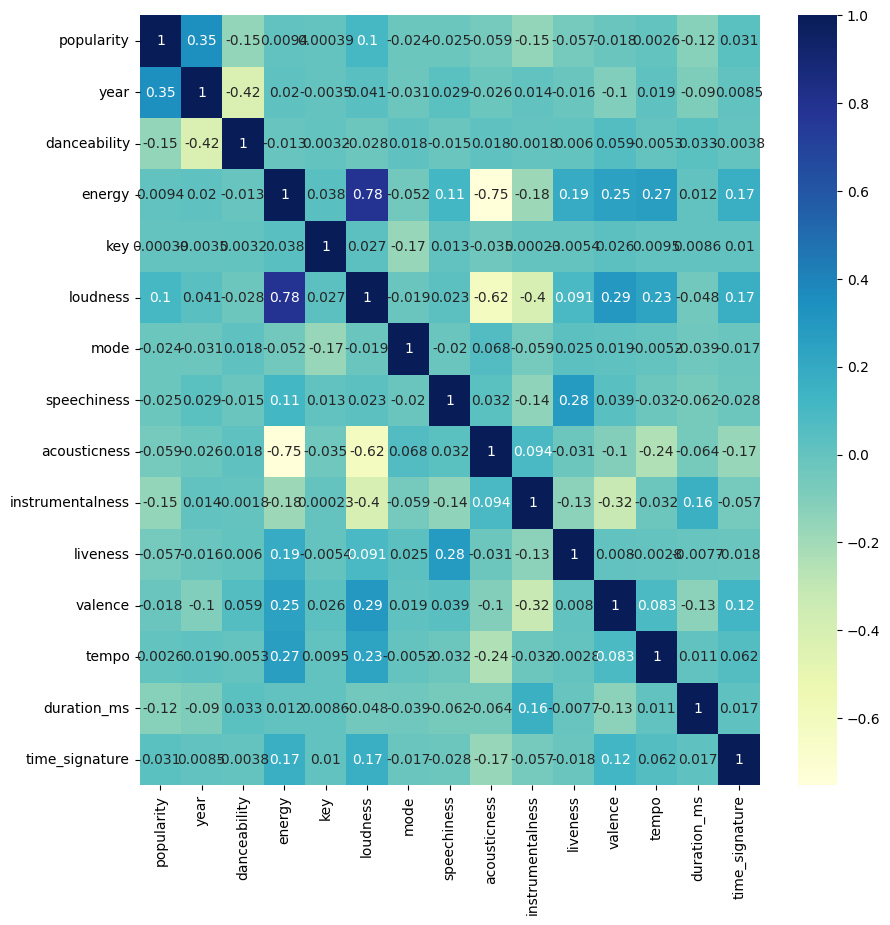

In [ ]:
#Python
drop_list = ['track_id', 'artist_name', 'track_name', 'Unnamed: 0', 'genre']

data = song_data.drop(drop_list, axis=1)

fig = plt.figure(figsize=(10, 10))
sns.heatmap(data.corr(), cmap="YlGnBu", annot=True)

plt.show()

In [ ]:
%%R
install.packages('corrplot')

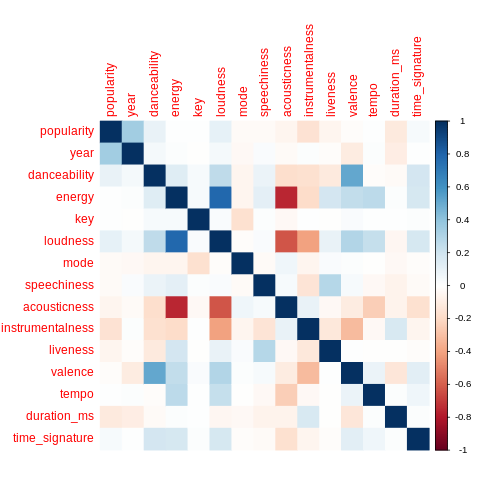

In [ ]:
%%R
library(corrplot)
drop <- c('track_id', 'artist_name', 'track_name', 'X', 'genre')
df = song_data[,!(names(song_data) %in% drop)]
M <- cor(df)
corrplot(M, method="color")

Можно заметить, что признаки energy и loudness коррелируют между собой (можно интерпретировать это так: чем громче трек, тем он энергичнее), а также есть отрицательная корреляция признаков acousticness-energy и acousticness-loudness.

## Фактор инфляции дисперсии

Оценим  степень мультиколлинеарности данных, вычислив фактор инфляции дисперсии (variance inflation factor).

In [ ]:
#Python
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

X = add_constant(data)
pd.Series([variance_inflation_factor(X.values, i)
           for i in range(X.shape[1])],
           index=X.columns)

const               120533.749051
popularity               1.199953
year                     1.369315
danceability             1.212080
energy                   4.317397
key                      1.030603
loudness                 3.333887
mode                     1.041980
speechiness              1.152799
acousticness             2.531286
instrumentalness         1.452926
liveness                 1.165840
valence                  1.228552
tempo                    1.087680
duration_ms              1.065039
time_signature           1.048056
dtype: float64

In [ ]:
%%R
install.packages('usdm')

In [ ]:
%%R
library(usdm)
vid_df <- vif(df)
print(vid_df)

          Variables      VIF
1        popularity 1.203021
2              year 1.158250
3      danceability 1.639208
4            energy 4.725216
5               key 1.030600
6          loudness 3.518511
7              mode 1.040523
8       speechiness 1.166839
9      acousticness 2.684686
10 instrumentalness 1.530286
11         liveness 1.186631
12          valence 1.702099
13            tempo 1.089892
14      duration_ms 1.077440
15   time_signature 1.054012


Все значения VIF меньше 5, что позволяет говорить об отсутствии мультиколлинеарности в данных.

# **11. Исследование зависимости в данных с помощью дисперсионного анализа**

Одно из ключевых требований для проведения дисперсионного анализа - нормальное распределение генеральной совокупности, однако признаков, для которых гипотеза о нормальности не отвергнута, нет.

Формально проведём однофакторный дисперсионный анализ для выявления влияния тональности песни (key) на её valence, однако следует понимать, что из-за отсутствия нормальности результат нужно интерпретировать осторожно!

Сформулируем гипотезу: тональность песни не оказывает влияние на valence, а наблюдаемые различия между групповыми средними несущественны и вызваны влиянием случайных факторов.

In [ ]:
#Python
from scipy.stats import f_oneway

f_oneway(song_data[song_data['key'] == 0]['valence'].to_numpy(),
         song_data[song_data['key'] == 1]['valence'].to_numpy(),
         song_data[song_data['key'] == 2]['valence'].to_numpy(),
         song_data[song_data['key'] == 3]['valence'].to_numpy(),
         song_data[song_data['key'] == 4]['valence'].to_numpy(),
         song_data[song_data['key'] == 5]['valence'].to_numpy(),
         song_data[song_data['key'] == 6]['valence'].to_numpy(),
         song_data[song_data['key'] == 7]['valence'].to_numpy(),
         song_data[song_data['key'] == 8]['valence'].to_numpy(),
         song_data[song_data['key'] == 9]['valence'].to_numpy(),
         song_data[song_data['key'] == 10]['valence'].to_numpy(),
         song_data[song_data['key'] == 11]['valence'].to_numpy())

F_onewayResult(statistic=299.26989681932037, pvalue=0.0)

In [ ]:
%%R
summary(aov(df$valence ~ df$key))

                 Df Sum Sq Mean Sq F value Pr(>F)    
df$key            1     56   56.21   780.2 <2e-16 ***
Residuals   1159762  83566    0.07                   
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


Вероятность в правом столбце $Pr(>F)$ в выводе R и p_value в Python меньше 0.05, следовательно имеются статистически значимые различия (есть веские основания отвергнуть нашу гипотезу).

 # **12. Регрессионные модели**

Попробуем использовать регрессионные модели, чтобы предсказать популярность песни по остальным её признакам. Будем оценивать модель с помощью $r^2$ score.

Проведём небольшой эксперимент: на python во всех моделях будем учитывать все признаки (в том числе и категориальный признак genre, который перекодируем в числовой с помощью one-hot encoding). На R во всех моделях будем учитывать только следующие признаки: danceability,	energy, loudness,	mode,	speechiness,	acousticness,	instrumentalness,	liveness,	valence,	tempo,	duration_ms,	time_signature. Посмотрим, какая модель будет лучше подгонять зависимость в данных.

Подготовим сначала данные. Ясно, что жанр - это категориальный признак. Превратим его в числовой, сделав one-hot преобразование, а также выделим обучающую и тестовую выборки:

In [ ]:
#Python
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler

X = song_data.drop(['popularity', 'track_id', 'artist_name', 'track_name', 'Unnamed: 0'], axis=1)
y = song_data['popularity']

categories_list = ['genre']

encoder = OneHotEncoder()
transformed = encoder.fit_transform(X[categories_list]).toarray()
X[encoder.categories_[0]] = transformed
X = X.drop(categories_list, axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=42, shuffle=True)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Теперь попробуем подогнать линейную регрессию:

In [ ]:
#Python
from sklearn.linear_model import LinearRegression

regressor = LinearRegression()

regressor.fit(X_train_scaled, y_train)
pred = regressor.predict(X_test_scaled)

r2_score(y_test, pred)

0.5497085636536148

Получили $r^2$ score, равный $\approx 0,55$

Теперь используем нелинейную модель (полиномиальная регрессия):

In [ ]:
#Python
from sklearn.preprocessing import PolynomialFeatures

X_mod = X.drop(encoder.categories_[0], axis=1)

poly = PolynomialFeatures(degree=2, include_bias=False)

X_mod = poly.fit_transform(X_mod)

np.concatenate((X_mod, transformed), axis=1)

X_train, X_test, y_train, y_test = train_test_split(X_mod, y, train_size=0.8, random_state=42, shuffle=True)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
#Python
from sklearn.linear_model import LinearRegression

regressor = LinearRegression()

regressor.fit(X_train, y_train)
pred = regressor.predict(X_test)

r2_score(y_test, pred)

0.22983042294205358

Получили $r^2$ score, равный $\approx 0,23$

Проделаем аналогичные процедуры в R.

In [ ]:
%%R
drop <- c('track_id', 'artist_name', 'track_name', 'X', 'genre', 'key', 'year')
df = song_data[,!(names(song_data) %in% drop)]
head(df)

  popularity danceability energy loudness mode speechiness acousticness
1         68        0.483  0.303  -10.058    1      0.0429       0.6940
2         50        0.572  0.454  -10.286    1      0.0258       0.4770
3         57        0.409  0.234  -13.711    1      0.0323       0.3380
4         58        0.392  0.251   -9.845    1      0.0363       0.8070
5         54        0.430  0.791   -5.419    0      0.0302       0.0726
6         48        0.566  0.570   -6.420    1      0.0329       0.6880
  instrumentalness liveness valence   tempo duration_ms time_signature
1         0.00e+00   0.1150   0.139 133.406      240166              3
2         1.37e-05   0.0974   0.515 140.182      216387              4
3         5.00e-05   0.0895   0.145 139.832      158960              4
4         0.00e+00   0.0797   0.508 204.961      304293              4
5         1.93e-02   0.1100   0.217 171.864      244320              4
6         1.73e-06   0.0943   0.960  83.403      166240              4

Линейная регрессия:

In [ ]:
%%R
model <- lm(formula = popularity ~ danceability	+ energy +
            loudness + speechiness + acousticness + mode +
            instrumentalness + liveness + valence	+ tempo	+
            duration_ms	+ time_signature, data = df)
summary(model)


Call:
lm(formula = popularity ~ danceability + energy + loudness + 
    speechiness + acousticness + mode + instrumentalness + liveness + 
    valence + tempo + duration_ms + time_signature, data = df)

Residuals:
    Min      1Q  Median      3Q     Max 
-30.874 -12.473  -2.646  10.200  89.617 

Coefficients:
                   Estimate Std. Error  t value Pr(>|t|)    
(Intercept)       3.026e+01  1.800e-01  168.131  < 2e-16 ***
danceability      1.034e+01  9.736e-02  106.214  < 2e-16 ***
energy           -7.560e+00  1.117e-01  -67.700  < 2e-16 ***
loudness          3.125e-01  4.642e-03   67.334  < 2e-16 ***
speechiness      -3.946e+00  1.223e-01  -32.258  < 2e-16 ***
acousticness     -3.157e+00  6.479e-02  -48.731  < 2e-16 ***
mode             -8.874e-01  2.980e-02  -29.782  < 2e-16 ***
instrumentalness -6.243e+00  4.669e-02 -133.716  < 2e-16 ***
liveness         -3.092e+00  7.709e-02  -40.116  < 2e-16 ***
valence          -8.764e+00  6.783e-02 -129.204  < 2e-16 ***
tempo            

Как видно, модель, учитывающая не все параметры, выдаёт худший результат: $r^2$ score равен $\approx 0,07$.

Подгоним теперь полиномиальную регрессию:

In [ ]:
%%R
model <- lm(popularity ~ polym(danceability, energy, loudness, speechiness,
                              acousticness, mode, instrumentalness, liveness,
                              valence, tempo, duration_ms, time_signature, degree=2, raw=TRUE), data = df)
summary(model)


Call:
lm(formula = popularity ~ polym(danceability, energy, loudness, 
    speechiness, acousticness, mode, instrumentalness, liveness, 
    valence, tempo, duration_ms, time_signature, degree = 2, 
    raw = TRUE), data = df)

Residuals:
     Min       1Q   Median       3Q      Max 
-121.437  -11.173   -2.314    9.586   92.656 

Coefficients: (1 not defined because of singularities)
                                                                                                                                                                                                 Estimate
(Intercept)                                                                                                                                                                                     1.644e+01
polym(danceability, energy, loudness, speechiness, acousticness, mode, instrumentalness, liveness, valence, tempo, duration_ms, time_signature, degree = 2, raw = TRUE)1.0.0.0.0.0.0.0.0.0.0.0  5.163e+01
polym(

Получили результат получше: $r^2$ score $\approx 0,15$; однако лучшая модель из представленных: линейная, учитывающая все переменные.